In [1]:
import os
print(os.getcwd())


f:\KAIM\Predicting-Price-Moves-\notebooks


In [2]:
import pandas as pd
from pathlib import Path

path = Path("data/yfinance_data/TSLA_historical_data.csv")
print(path.resolve())
print(path.exists())
df = pd.read_csv("../data/raw_analyst_ratings.csv", parse_dates=["date"])



F:\KAIM\Predicting-Price-Moves-\notebooks\data\yfinance_data\TSLA_historical_data.csv
False


In [3]:
print(df.head)

<bound method NDFrame.head of          Unnamed: 0                                           headline  \
0                 0            Stocks That Hit 52-Week Highs On Friday   
1                 1         Stocks That Hit 52-Week Highs On Wednesday   
2                 2                      71 Biggest Movers From Friday   
3                 3       46 Stocks Moving In Friday's Mid-Day Session   
4                 4  B of A Securities Maintains Neutral on Agilent...   
...             ...                                                ...   
1407323     1413844             Top Narrow Based Indexes For August 29   
1407324     1413845  Recap: Wednesday's Top Percentage Gainers and ...   
1407325     1413846  UPDATE: Oppenheimer Color on China Zenix Auto ...   
1407326     1413847  Oppenheimer Initiates China Zenix At Outperfor...   
1407327     1413848  China Zenix Auto International Opens For Tradi...   

                                                       url          publisher  \


In [4]:
df.tail

<bound method NDFrame.tail of          Unnamed: 0                                           headline  \
0                 0            Stocks That Hit 52-Week Highs On Friday   
1                 1         Stocks That Hit 52-Week Highs On Wednesday   
2                 2                      71 Biggest Movers From Friday   
3                 3       46 Stocks Moving In Friday's Mid-Day Session   
4                 4  B of A Securities Maintains Neutral on Agilent...   
...             ...                                                ...   
1407323     1413844             Top Narrow Based Indexes For August 29   
1407324     1413845  Recap: Wednesday's Top Percentage Gainers and ...   
1407325     1413846  UPDATE: Oppenheimer Color on China Zenix Auto ...   
1407326     1413847  Oppenheimer Initiates China Zenix At Outperfor...   
1407327     1413848  China Zenix Auto International Opens For Tradi...   

                                                       url          publisher  \


In [5]:
import pandas as pd
from eda import plot_daily_news_volume, plot_top_stocks, plot_publisher_distribution
!pip install c:\Users\user\Downloads\ta_lib-0.6.3-cp311-cp311-win_amd64.whl
!pip install yfinance

Processing c:\users\user\downloads\ta_lib-0.6.3-cp311-cp311-win_amd64.whl
ta-lib is already installed with the same version as the provided wheel. Use --force-reinstall to force an installation of the wheel.


In [ ]:
import yfinance as yf
import pandas as pd

# Download and label
tickers = ['TSLA', 'AAPL','AMZN','GOOG','META','MSFT','NVDA']
dfs = []

for ticker in tickers:
    df = yf.download(ticker, start="2011-01-01", end="2024-06-30")
    df.reset_index(inplace=True)
    df['ticker'] = ticker
    dfs.append(df)

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [43]:
import pandas as pd
df_price = pd.concat(dfs, ignore_index=True)
# Flatten MultiIndex columns if necessary
if isinstance(df_price.columns, pd.MultiIndex):
    df_price.columns = ['_'.join([str(i) for i in col if i]) for col in df_price.columns]

# Now you can safely lowercase
df_price.columns = df_price.columns.str.lower()

In [44]:
print(df)

Price        Date       Close        High         Low        Open      Volume  \
Ticker                   NVDA        NVDA        NVDA        NVDA        NVDA   
0      2011-01-03    0.362674    0.366113    0.355338    0.355796   817448000   
1      2011-01-04    0.361528    0.364966    0.353504    0.363362   651384000   
2      2011-01-05    0.389267    0.389725    0.364508    0.368176  1428216000   
3      2011-01-06    0.443141    0.443370    0.398208    0.399354  3493312000   
4      2011-01-07    0.455520    0.456896    0.428239    0.438097  2579984000   
...           ...         ...         ...         ...         ...         ...   
3389   2024-06-24  118.080894  124.429328  118.010912  123.209628   476060900   
3390   2024-06-25  126.058922  126.468824  119.290594  121.170128   425787500   
3391   2024-06-26  126.368866  128.088436  122.569799  126.098928   362975900   
3392   2024-06-27  123.959450  126.378859  122.889714  124.069423   252571700   
3393   2024-06-28  123.50956

In [45]:
# TSLA
df_tsla = df_price[['date', 'close_tsla', 'high_tsla', 'low_tsla', 'open_tsla', 'volume_tsla']].copy()
df_tsla.columns = ['date', 'close', 'high', 'low', 'open', 'volume']
df_tsla['ticker'] = 'TSLA'

# AAPL
df_aapl = df_price[['date', 'close_aapl', 'high_aapl', 'low_aapl', 'open_aapl', 'volume_aapl']].copy()
df_aapl.columns = ['date', 'close', 'high', 'low', 'open', 'volume']
df_aapl['ticker'] = 'AAPL'

# AMZN
df_amzn = df_price[['date', 'close_amzn', 'high_amzn', 'low_amzn', 'open_amzn', 'volume_amzn']].copy()
df_amzn.columns = ['date', 'close', 'high', 'low', 'open', 'volume']
df_amzn['ticker'] = 'AMZN'

# GOOG
df_goog = df_price[['date', 'close_goog', 'high_goog', 'low_goog', 'open_goog', 'volume_goog']].copy()
df_goog.columns = ['date', 'close', 'high', 'low', 'open', 'volume']
df_goog['ticker'] = 'GOOG'

# META
df_meta = df_price[['date', 'close_meta', 'high_meta', 'low_meta', 'open_meta', 'volume_meta']].copy()
df_meta.columns = ['date', 'close', 'high', 'low', 'open', 'volume']
df_meta['ticker'] = 'META'

# MSFT
df_msft = df_price[['date', 'close_msft', 'high_msft', 'low_msft', 'open_msft', 'volume_msft']].copy()
df_msft.columns = ['date', 'close', 'high', 'low', 'open', 'volume']
df_msft['ticker'] = 'MSFT'

# NVDA
df_nvda = df_price[['date', 'close_nvda', 'high_nvda', 'low_nvda', 'open_nvda', 'volume_nvda']].copy()
df_nvda.columns = ['date', 'close', 'high', 'low', 'open', 'volume']
df_nvda['ticker'] = 'NVDA'



In [46]:
df_price_clean = pd.concat([df_tsla, df_aapl, df_goog, df_amzn, df_nvda, df_meta, df_msft], ignore_index=True)
df_price_clean.dropna(subset=['close', 'open', 'high', 'low', 'volume'], inplace=True)


In [47]:
print(df_price_clean.tail())
print(df_price_clean['ticker'].value_counts())


             date       close        high         low        open      volume  \
160478 2024-06-24  444.263855  449.305190  443.013432  446.377623  15913700.0   
160479 2024-06-25  447.518890  447.985316  443.350835  444.839422  16747500.0   
160480 2024-06-26  448.719666  450.148711  444.779871  445.583705  16507000.0   
160481 2024-06-27  449.404449  452.699196  448.332650  448.739534  14806300.0   
160482 2024-06-28  443.549347  451.915199  443.013447  449.622777  28362300.0   

       ticker  
160478   MSFT  
160479   MSFT  
160480   MSFT  
160481   MSFT  
160482   MSFT  
ticker
TSLA    3394
AAPL    3394
GOOG    3394
AMZN    3394
NVDA    3394
MSFT    3394
META    3047
Name: count, dtype: int64


In [48]:
print(df_price.columns)

Index(['date', 'close_tsla', 'high_tsla', 'low_tsla', 'open_tsla',
       'volume_tsla', 'ticker', 'close_aapl', 'high_aapl', 'low_aapl',
       'open_aapl', 'volume_aapl', 'close_amzn', 'high_amzn', 'low_amzn',
       'open_amzn', 'volume_amzn', 'close_goog', 'high_goog', 'low_goog',
       'open_goog', 'volume_goog', 'close_meta', 'high_meta', 'low_meta',
       'open_meta', 'volume_meta', 'close_msft', 'high_msft', 'low_msft',
       'open_msft', 'volume_msft', 'close_nvda', 'high_nvda', 'low_nvda',
       'open_nvda', 'volume_nvda'],
      dtype='object')


In [9]:
print(df_price.head())

        date     close      high       low      open    volume
0 2011-01-03  1.774667  1.800000  1.726667  1.789333  19245000
1 2011-01-04  1.778000  1.796667  1.734667  1.777333  17811000
2 2011-01-05  1.788667  1.793333  1.746000  1.765333  21700500
3 2011-01-06  1.858667  1.866667  1.787333  1.788667  30918000
4 2011-01-07  1.882667  1.905333  1.860000  1.866667  33718500


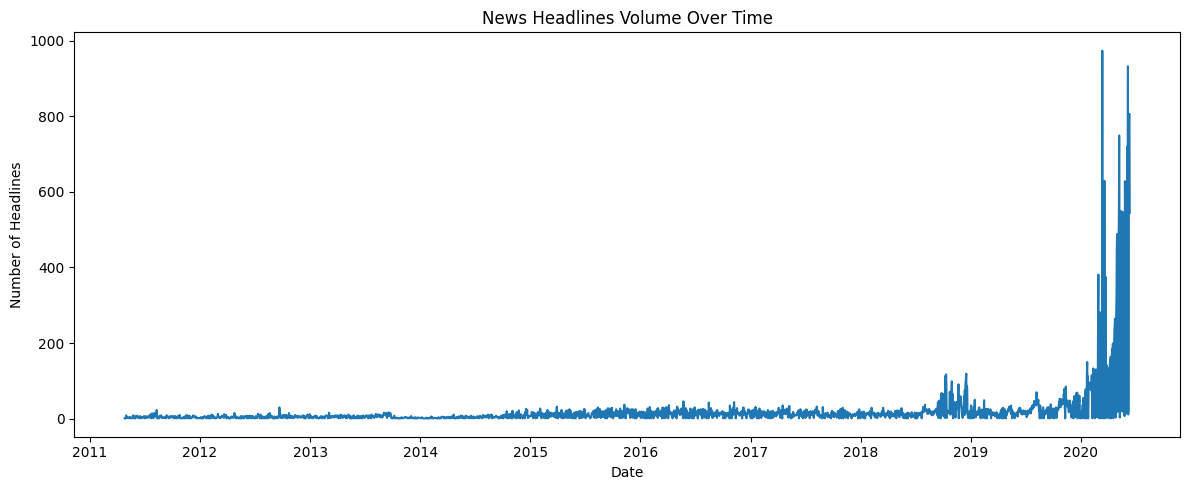

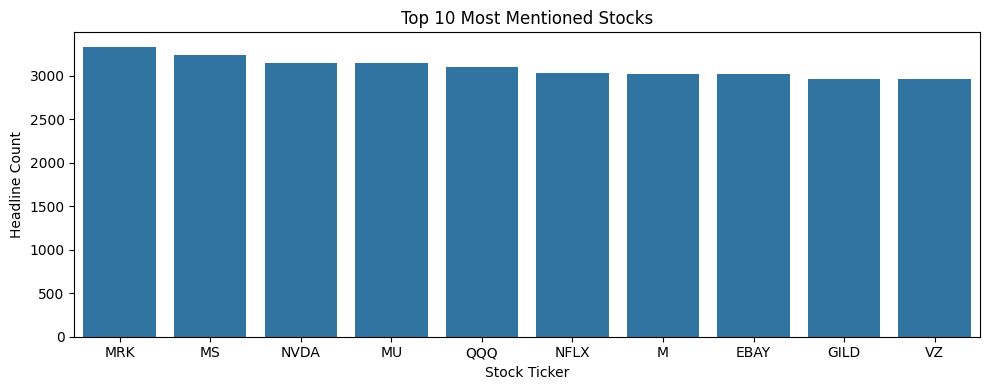

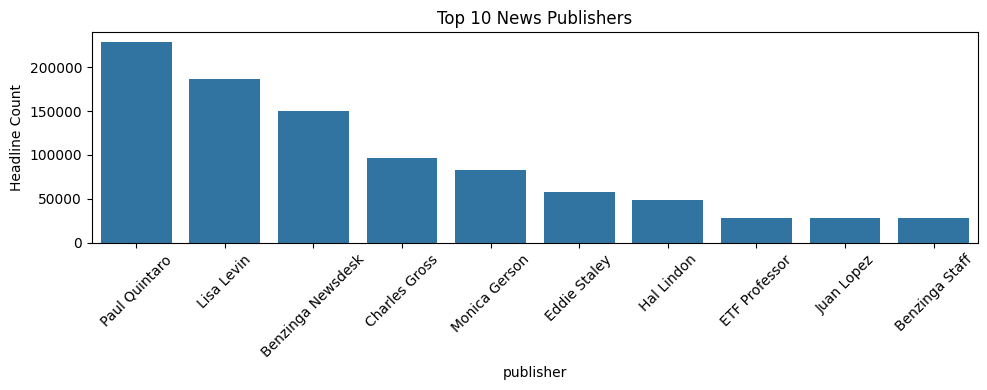

In [50]:

import talib
import pandas as pd
from quant_stat import add_technical_indicators, describe_price_statistics
from eda import plot_top_stocks, plot_daily_news_volume, plot_publisher_distribution, plot_headline_length_distribution

df_news = pd.read_csv("../data/raw_analyst_ratings.csv", parse_dates=["date"])
df_news['date'] = pd.to_datetime(df_news['date'], errors='coerce')

plot_daily_news_volume(df_news)
plot_top_stocks(df_news)
plot_publisher_distribution(df_news)

In [52]:
df_price_clean = add_technical_indicators(df_price_clean)
describe_price_statistics(df_price_clean)

,close,daily_return,sma_10,ema_10,atr
count,23411.000000,23410.000000,23402.000000,23402.000000,23397.000000
mean,81.817907,4.384732,81.789159,81.789634,62.548866
std,91.626080,15.611437,69.479479,69.794982,44.468709
min,0.260887,-0.995136,6.446226,5.862432,5.911808
25%,16.042212,-0.573551,25.463168,25.205056,23.704100
50%,40.359783,-0.002172,57.374554,56.174477,55.498738
75%,130.370560,1.366497,138.441274,137.744805,94.742212
max,525.423157,204.300236,316.580447,317.753635,211.045596


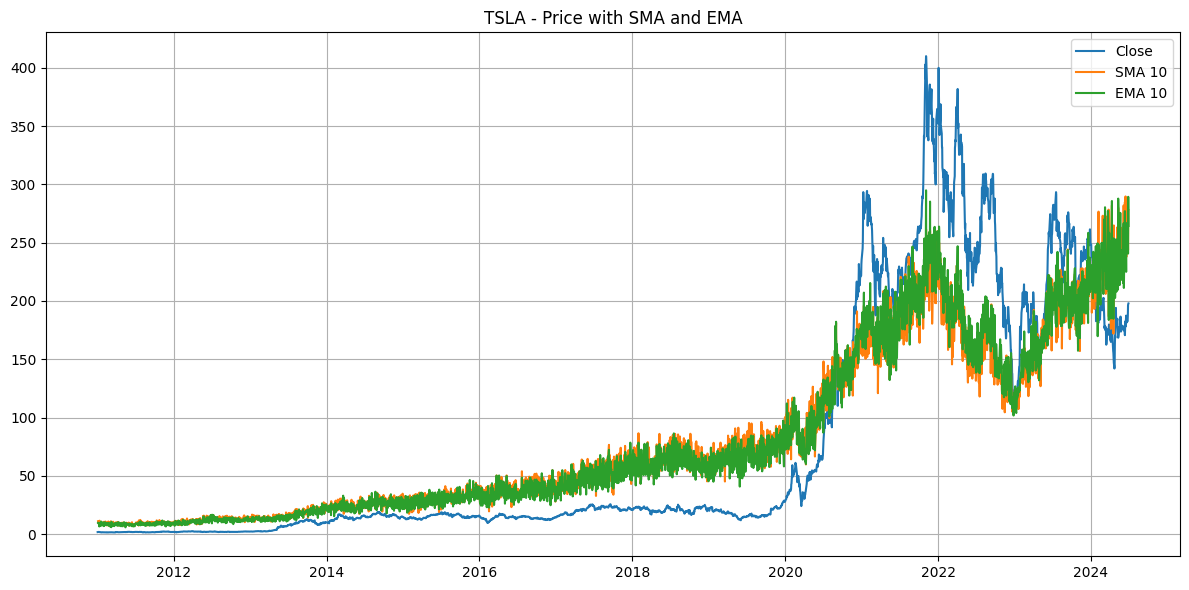

In [54]:
import matplotlib.pyplot as plt

df_sample = df_price_clean[df_price_clean['ticker'] == 'TSLA'].sort_values('date')

plt.figure(figsize=(12, 6))
plt.plot(df_sample['date'], df_sample['close'], label='Close')
plt.plot(df_sample['date'], df_sample['sma_10'], label='SMA 10')
plt.plot(df_sample['date'], df_sample['ema_10'], label='EMA 10')
plt.title("TSLA - Price with SMA and EMA")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

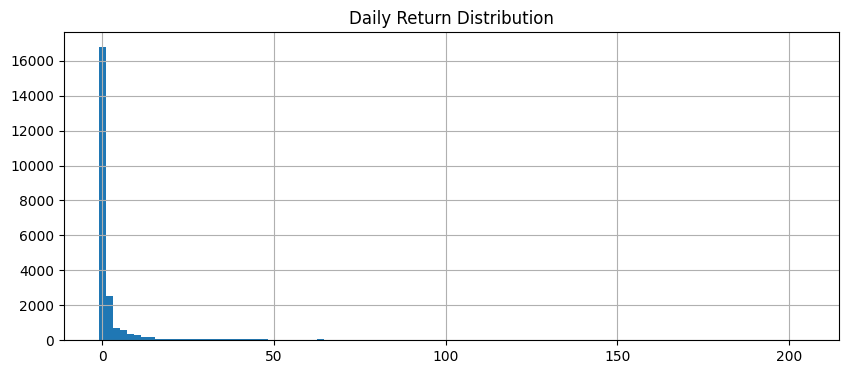

In [55]:
# Visualize return distribution
df_price_clean['daily_return'].hist(bins=100, figsize=(10,4))
plt.title('Daily Return Distribution')
plt.show()

# Optionally clip returns to reduce outlier effect
df_price_clean['daily_return_clipped'] = df_price_clean['daily_return'].clip(lower=-0.5, upper=0.5)


In [ ]:
from analyzer import apply_sentiment_analysis
df_news = apply_sentiment_analysis(df_news)

print(df_news)

In [66]:
# Aggregate sentiment daily
sentiment_daily = df_news.groupby(['stock', 'date_only'])['sentiment'].mean().reset_index()
sentiment_daily = sentiment_daily.rename(columns={'stock': 'ticker', 'date_only': 'date'})

# Prepare price data date column
df_price_clean['date'] = pd.to_datetime(df_price_clean['date'])
df_price_clean['date'] = pd.to_datetime(df_price_clean['date'])
sentiment_daily['date'] = pd.to_datetime(sentiment_daily['date'])

# Merge
df_merged = pd.merge(df_price_clean, sentiment_daily, on=['ticker', 'date'], how='left')

# Fill missing sentiment if desired
df_merged['sentiment'] = df_merged['sentiment'].fillna(0)


In [76]:
import talib

df_merged['RSI'] = talib.RSI(df_merged['close'], timeperiod=14)


In [77]:
def trading_signal(row):
    if row['RSI'] < 30 and row['sentiment'] > 0:
        return 1  # Buy
    elif row['RSI'] > 70 or row['sentiment'] < 0:
        return -1  # Sell
    else:
        return 0  # Hold / No action

df_merged['signal'] = df_merged.apply(trading_signal, axis=1)


In [78]:
# Calculate daily returns
df_merged['returns'] = df_merged['close'].pct_change()

# Strategy returns = signal lagged by 1 day * returns (to avoid lookahead bias)
df_merged['strategy_returns'] = df_merged['signal'].shift(1) * df_merged['returns']

# Cumulative returns
df_merged['cumulative_strategy_returns'] = (1 + df_merged['strategy_returns']).cumprod() - 1
df_merged['cumulative_market_returns'] = (1 + df_merged['returns']).cumprod() - 1


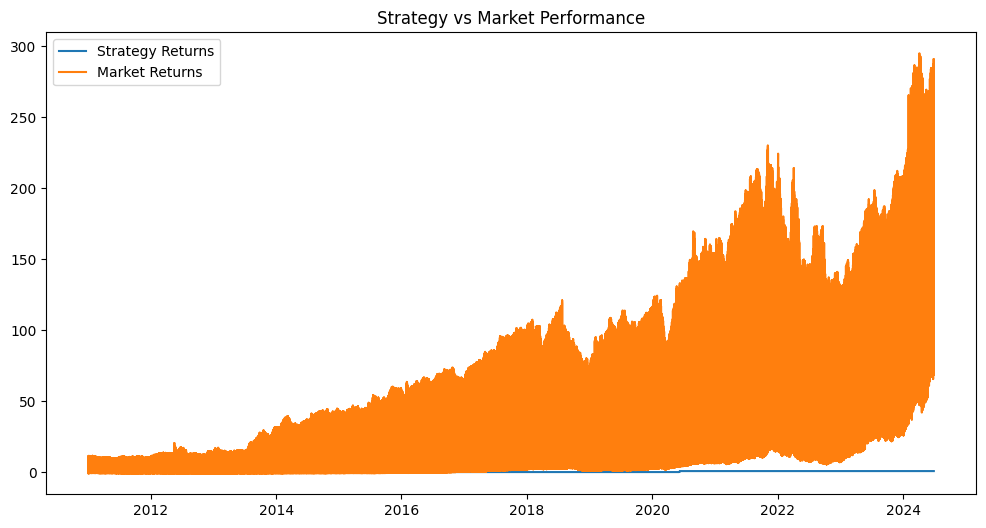

In [79]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))
plt.plot(df_merged['date'], df_merged['cumulative_strategy_returns'], label='Strategy Returns')
plt.plot(df_merged['date'], df_merged['cumulative_market_returns'], label='Market Returns')
plt.legend()
plt.title('Strategy vs Market Performance')
plt.show()


In [80]:
from corr import add_more_indicators
df_price = add_more_indicators(df_price)
df_price['norm_return'] = (df_price['close'] / df_price['close'].iloc[0]) - 1
df_merged = df_merged.sort_values('date').copy()
df_merged = add_more_indicators(df_merged)
df_corr_ready = df_merged.dropna(subset=['sentiment', 'rsi_14', 'macd', 'macd_signal', 'macd_hist'])
correlation_results = df_corr_ready[['sentiment', 'rsi_14', 'macd', 'macd_signal', 'macd_hist']].corr()
print(correlation_results)


             sentiment    rsi_14      macd  macd_signal  macd_hist
sentiment     1.000000 -0.011668 -0.005976     0.001229  -0.008064
rsi_14       -0.011668  1.000000  0.513341     0.001595   0.635377
macd         -0.005976  0.513341  1.000000     0.620200   0.907801
macd_signal   0.001229  0.001595  0.620200     1.000000   0.234020
macd_hist    -0.008064  0.635377  0.907801     0.234020   1.000000


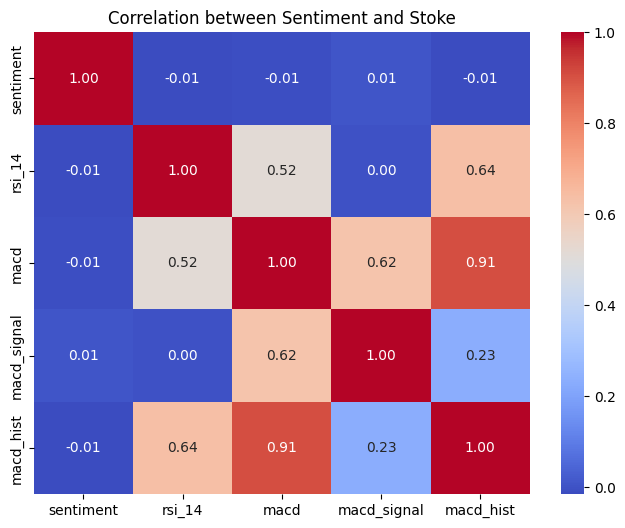

In [70]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_results, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation between Sentiment and Stoke")
plt.show()

In [82]:
import talib

def calc_rsi(group):
    group = group.copy()
    group['RSI'] = talib.RSI(group['close'], timeperiod=14)
    return group

df_merged['RSI'] = df_merged.groupby('ticker')['close'].transform(lambda x: talib.RSI(x, timeperiod=14))



In [83]:
def trading_signal(row):
    if row['RSI'] < 30 and row['sentiment'] > 0:
        return 1
    elif row['RSI'] > 70 or row['sentiment'] < 0:
        return -1
    else:
        return 0

df_merged['signal'] = df_merged.apply(trading_signal, axis=1)


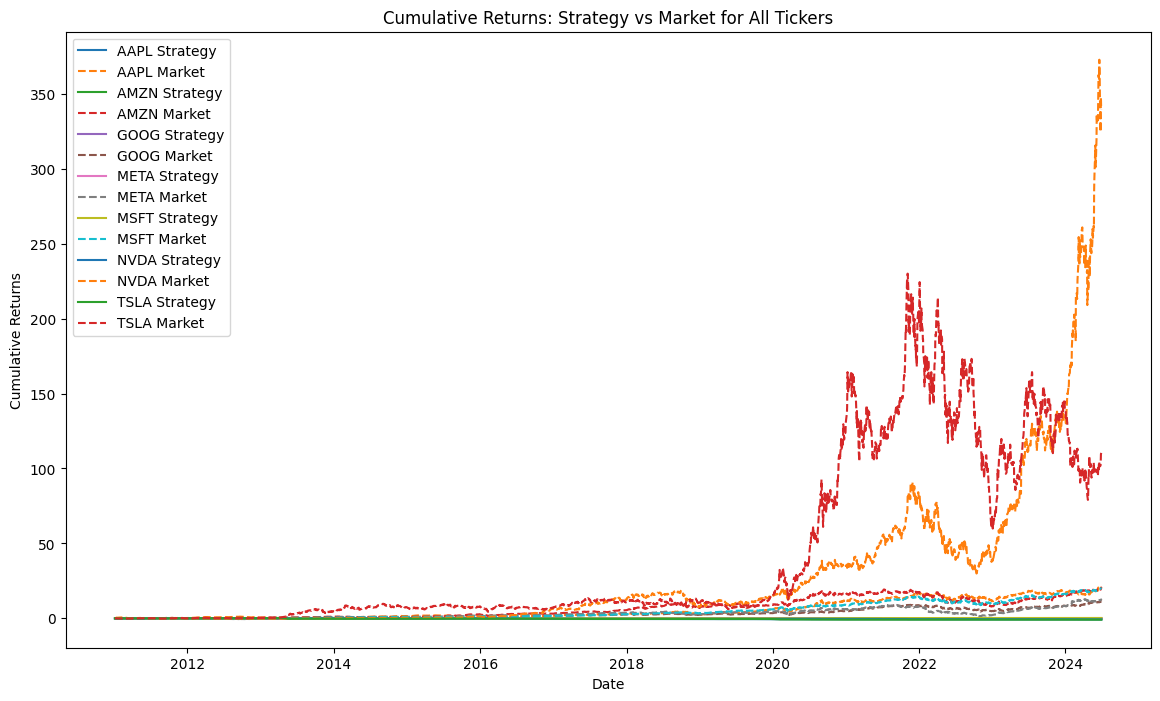

In [89]:
import matplotlib.pyplot as plt

plt.figure(figsize=(14,8))

for ticker, group in df_merged.groupby('ticker'):
    plt.plot(group['date'], group['cumulative_strategy_returns'], label=f"{ticker} Strategy")
    plt.plot(group['date'], group['cumulative_market_returns'], label=f"{ticker} Market", linestyle='--')

plt.legend()
plt.title('Cumulative Returns: Strategy vs Market for All Tickers')
plt.xlabel('Date')
plt.ylabel('Cumulative Returns')
plt.show()


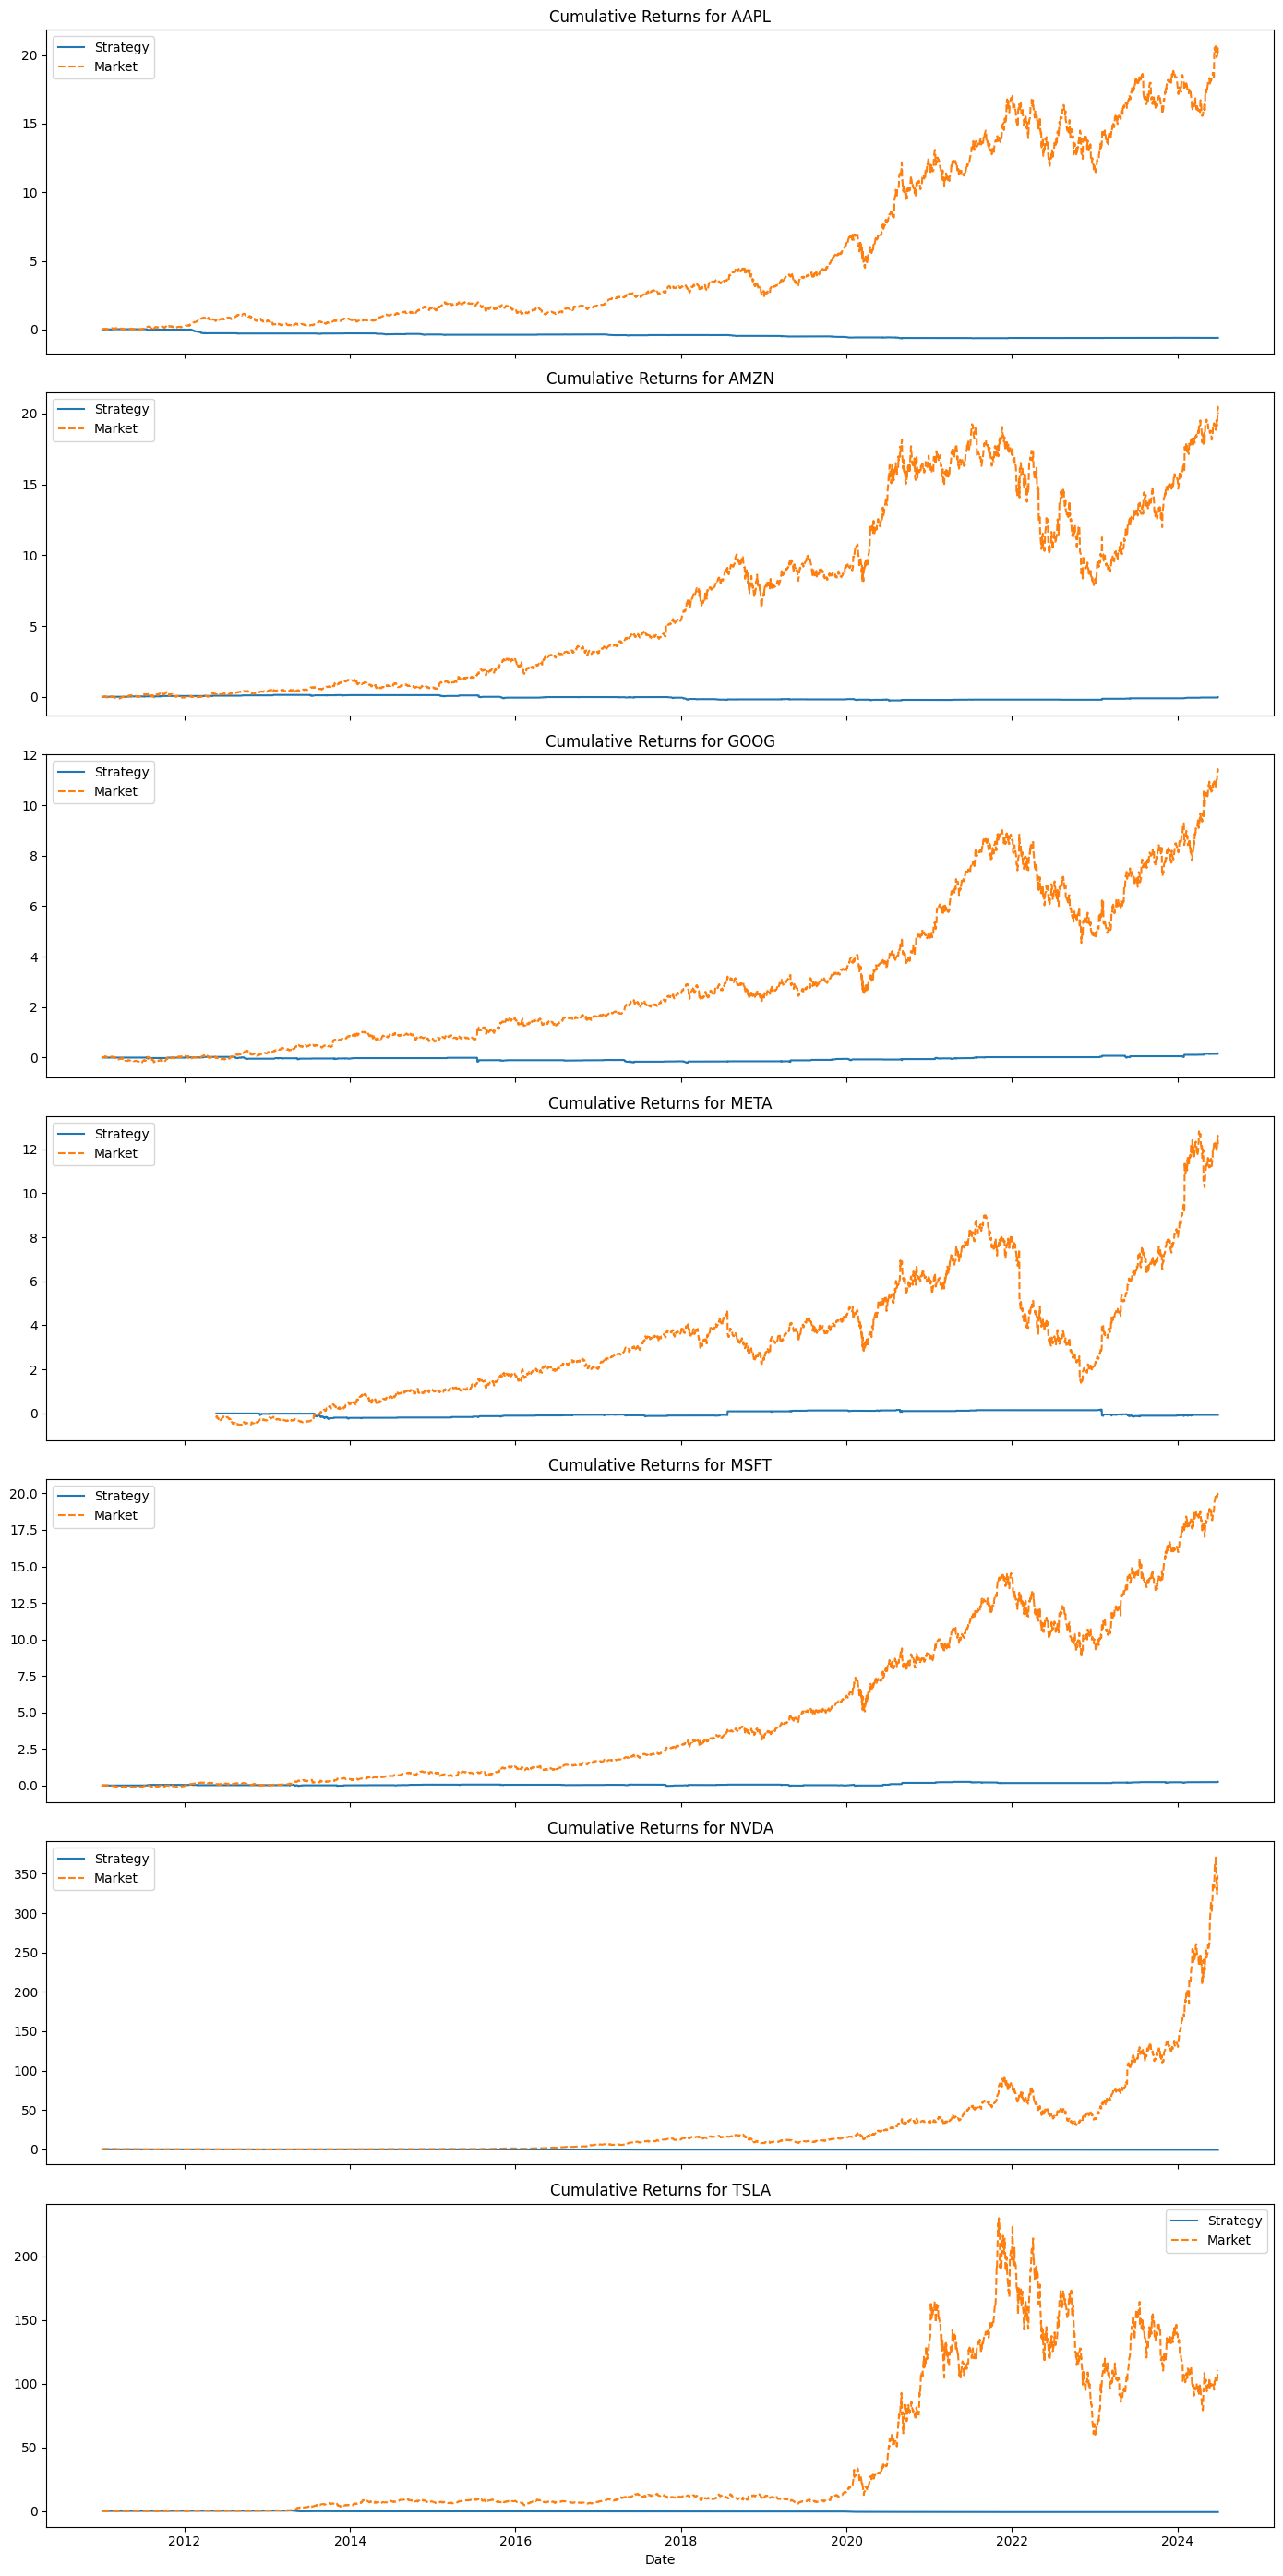

In [90]:
tickers = df_merged['ticker'].unique()
n = len(tickers)
fig, axes = plt.subplots(n, 1, figsize=(14, 4*n), sharex=True)

for ax, ticker in zip(axes, tickers):
    group = df_merged[df_merged['ticker'] == ticker]
    ax.plot(group['date'], group['cumulative_strategy_returns'], label='Strategy')
    ax.plot(group['date'], group['cumulative_market_returns'], label='Market', linestyle='--')
    ax.set_title(f'Cumulative Returns for {ticker}')
    ax.legend()

plt.xlabel('Date')
plt.tight_layout()
plt.show()
